In [56]:
''' statements to import libraries'''
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from scipy.stats import kurtosis
from pandas.api.types import CategoricalDtype
from sklearn.model_selection import train_test_split
from sklearn.metrics import *
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import cohen_kappa_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from scipy.stats import uniform, randint
from collections import Counter
from imblearn.over_sampling import SMOTE



pd.set_option('display.width', 1000)  # Set the maximum width of the display
pd.set_option('display.max_columns', None)  # Display all columns without truncation
np.set_printoptions(linewidth=150)

In [25]:
'''statements to add csv files, remove duplicates etc. Just Red and white individually
'''
#White wine
white_df = pd.read_csv('wine+quality/winequality-white.csv', sep= ';')
white_copy = white_df.copy()
white_copy.columns = white_copy.columns.str.replace(' ', '_')
print(white_copy.head())

white_copy = white_copy.drop_duplicates()
print(white_copy.head())

if 'colour' not in white_copy.columns:
    white_copy['colour'] = 'white'
else:
    pass

#Red wine
red_df = pd.read_csv('wine+quality/winequality-red.csv', sep = ';')
red_copy = red_df.copy()
if 'colour' not in red_copy.columns:
    red_copy['colour'] = 'red'
else:
    pass

red_copy.columns = red_copy.columns.str.replace(' ', '_')
red_copy = red_copy.drop_duplicates()


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8        6
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5        6
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1        6
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6
4            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6
   fixed_acidity  volatile_a

In [26]:
''' add new column to wine_quality
low <= 5
5 < medium < 7
high >= 7
'''
if 'quality_label' not in white_copy.columns:
    white_copy['quality_label'] = white_copy.quality.apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
else:
    pass


if 'quality_label' not in red_copy.columns:
    red_copy['quality_label'] = red_copy.quality.apply(lambda value: 'low' if value <= 5 else 'medium' if value <= 7 else 'high')
else:
    pass


'''add new Column wine_type'''
if 'wine_type' not in white_copy.columns:
    white_copy['wine_type'] = white_copy.quality.apply(lambda value: 'white')
else:
    pass
if 'wine_type' not in red_copy.columns:
    red_copy['wine_type'] = red_copy.quality.apply(lambda value: 'red')
else:
    pass



In [27]:
'''combining DFs and creating white_red_df'''

white_red_df = pd.concat([white_copy, red_copy])
white_red_copy = white_red_df.copy()

print(white_red_copy.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality colour quality_label wine_type
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8        6  white        medium     white
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5        6  white        medium     white
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1        6  white        medium     white
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6  white        medium     white
6            6.2              0.32 

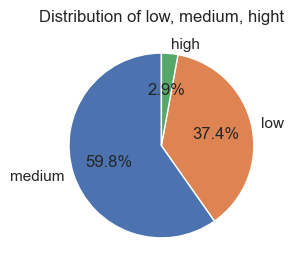

In [28]:
label_counts = white_red_df.quality_label.value_counts()
plt.figure(figsize= (3,3))
sns.set(style = 'whitegrid')
plt.pie(label_counts, labels = label_counts.index, autopct = '%1.1f%%', startangle = 90)
plt.title('Distribution of low, medium, high')
plt.show()

In [29]:
#ml_df = white_red_copy.reset_index()
ml_df = white_red_copy
print(ml_df.head())


   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality colour quality_label wine_type
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8        6  white        medium     white
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5        6  white        medium     white
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1        6  white        medium     white
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9        6  white        medium     white
6            6.2              0.32 

In [30]:
''' lets use label encoder to encode the wine_quality
we cannot use onehot encoder as that only does binary, dichotomous choices
low 1
medium 2
high 0
'''
# from sklearn.preprocessing import LabelEncoder

# from sklearn.preprocessing import OrdinalEncoder
# categories = ['low', 'medium', 'high']
# categories = np.reshape(categories, (1, -1))
# oe = OrdinalEncoder(categories = ['low', 'medium', 'high'])
# ml_df['quality_label_encoded'] = oe.fit_transform(ml_df['quality_label'])
# print(ml_df.head(20))
# display(ml_df.info())
quality_codes = {'low' : 0, 'medium': 1, 'high':2}
ml_df['quality_label'].replace(quality_codes, inplace= True)
ml_df['quality_label_encoded'] = ml_df.quality_label




In [31]:
''' drop other unwanted columns: quality_label, colour, quality'''
for val in ['quality_label','colour', 'quality', 'wine_type', 'index']:
    if val in ml_df.columns:
        ml_df.drop(val, axis =1, inplace= True)
print(ml_df.head())
ml_df = ml_df.reset_index()
ml_df.drop('index', axis = 1, inplace=True)
print(ml_df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality_label_encoded
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8                      1
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5                      1
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1                      1
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9                      1
6            6.2              0.32         0.16             7.0      0.045                 30.0                 136.0   

In [32]:
#work out evaluation metrics
def compute_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted', zero_division = 1)
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    return accuracy, precision, recall, f1

In [33]:
def random_forest_kfold(X, Y):
    Y = np.ravel(Y)
    #creating an instance of the random forest classifier
    tree = RandomForestClassifier()

    #how many 'folds' do we want
    n_folds = 3
    #initialize the StratifiedKFold object
    skf = StratifiedKFold(n_splits= n_folds, shuffle = True, random_state=42)
    
    #used to hold results from each loop 
    accuracy_list, precision_list, recall_list, f1_list, kappa_list = [], [], [], [], []

    #because n_folds= 5 this should run 5 times
    #it will return two lists of indexes - 1 for the training: X and 1 for the test: Y
    for train, test in skf.split(X ,Y):
        #we isolate the appropriate indexes for our training and our testing
        X_train_k, X_test_k = X.loc[train], X.loc[test]
        y_train_k, y_test_k = Y[train], Y[test]
        #we enter our training data in to the instance of DecisionTreeClassifier we created
        tree.fit(X_train_k, y_train_k)
        #we test our model by entering our test X ie. the DF with our variables we have not used so far
        y_pred = tree.predict(X_test_k)
        #use the inbuilt compute_metrics to get the accuracy, precision, recall and f1 stats and add them to our container lists
        accuracy, precision, recall, f1 = compute_metrics(y_test_k, y_pred)
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        kappa_score = cohen_kappa_score(y_test_k, y_pred)
        kappa_list.append(kappa_score)

    #get the average of each our run throughs
    accuracy = np.mean(accuracy_list)
    precision = np.mean(accuracy_list)
    recall = np.mean(recall_list)
    f1 = np.mean(f1_list)
    kappa = np.mean(kappa_list)
    return [accuracy, precision, recall, f1, kappa]


In [36]:
def random_forest_kfold_param(X, Y):
    Y = np.ravel(Y)
    #creating an instance of the random forest classifier
    #parameters = {'n_estimators': 30, 'max_features': 'sqrt', 'criterion': 'entropy', 'bootstrap': True}
    parameters = {'bootstrap': True, 'max_depth': None, 'min_samples_split': 11, 'n_estimators': 200, 'class_weight': 'balanced', 'max_features': 4}
    tree = RandomForestClassifier(**parameters)

    #how many 'folds' do we want
    n_folds = 5
    #initialize the StratifiedKFold object
    skf = StratifiedKFold(n_splits= n_folds, shuffle = True, random_state=42)
    
    #used to hold results from each loop 
    accuracy_list, precision_list, recall_list, f1_list, kappa_list = [], [], [], [], []

    #because n_folds= 5 this should run 5 times
    #it will return two lists of indexes - 1 for the training: X and 1 for the test: Y
    for train, test in skf.split(X ,Y):
        #we isolate the appropriate indexes for our training and our testing
        X_train_k, X_test_k = X.loc[train], X.loc[test]
        y_train_k, y_test_k = Y[train], Y[test]
        #we enter our training data in to the instance of DecisionTreeClassifier we created
        tree.fit(X_train_k, y_train_k)
        #we test our model by entering our test X ie. the DF with our variables we have not used so far
        y_pred = tree.predict(X_test_k)
        conf_matrix = confusion_matrix(y_test_k, y_pred)
        conf_matrix_df = pd.DataFrame(conf_matrix, index = ['low', 'medium', 'high'], columns = ['pred_low', 'pred_med', 'pred_high'])
        plt.figure(figsize = (3,3))
        sns.heatmap(conf_matrix_df, annot = True, cmap ='Blues', fmt= 'd', cbar= False)
        plt.show()
        #use the inbuilt compute_metrics to get the accuracy, precision, recall and f1 stats and add them to our container lists
        accuracy, precision, recall, f1 = compute_metrics(y_test_k, y_pred)
        accuracy_list.append(accuracy)
        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)
        kappa_score = cohen_kappa_score(y_test_k, y_pred)
        kappa_list.append(kappa_score)

    #get the average of each our run throughs
    accuracy = np.mean(accuracy_list)
    precision = np.mean(precision_list)
    recall = np.mean(recall_list)
    f1 = np.mean(f1_list)
    kappa = np.mean(kappa_list)
    return [accuracy, precision, recall, f1, kappa]


In [37]:
X_df = ml_df.iloc[:,:-1]
y_df = ml_df.iloc[:, -1:]
print(X_df.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9
4            6.2              0.32         0.16             7.0      0.045                 30.0                 136.0   0.9949  3.18       0.47      9.6


In [63]:
random_forest_kfold(X_df, y_df)

[0.7391014704894262,
 0.7391014704894262,
 0.7391014704894262,
 0.7269395684389036,
 0.45669341955204895]

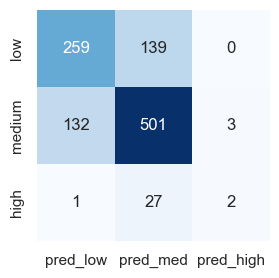

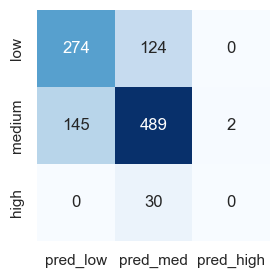

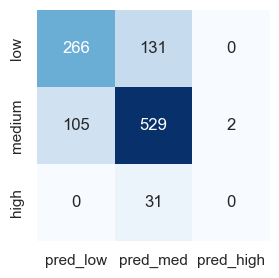

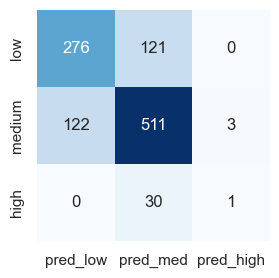

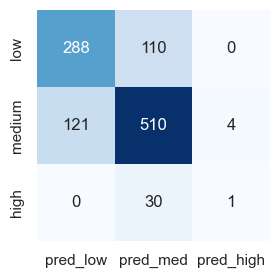

[0.7343984962406014,
 0.7193291742919193,
 0.7343984962406014,
 0.7249753162525634,
 0.4558305625289038]

In [39]:
random_forest_kfold_param(X_df, y_df)

In [ ]:
random_forest_kfold_param(X_df, y_df)

In [40]:
X_train, x_test, y_train, y_test = train_test_split( X_df, y_df, test_size = 0.2, random_state = 42)


In [41]:
rf = RandomForestClassifier()
param_dist = {
    'n_estimators': [x for x in range(0,200,10)], 'max_depth': [None] + list(randint(1, 20).rvs(5)),
    'min_samples_split': randint(2, 20), 'bootstrap': [True, False]

}
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, scoring = 'accuracy', cv=5)
random_search.fit(X_train, y_train)
# Get the best hyperparameter combination
best_params = random_search.best_params_


/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)
/Users/barry/anaconda3/lib/python3.11/site-packages/sklearn/base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change

In [ ]:
print(best_params)

In [42]:
print(ml_df.head())
print(ml_df.shape)

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide  density    pH  sulphates  alcohol  quality_label_encoded
0            7.0              0.27         0.36            20.7      0.045                 45.0                 170.0   1.0010  3.00       0.45      8.8                      1
1            6.3              0.30         0.34             1.6      0.049                 14.0                 132.0   0.9940  3.30       0.49      9.5                      1
2            8.1              0.28         0.40             6.9      0.050                 30.0                  97.0   0.9951  3.26       0.44     10.1                      1
3            7.2              0.23         0.32             8.5      0.058                 47.0                 186.0   0.9956  3.19       0.40      9.9                      1
4            6.2              0.32         0.16             7.0      0.045                 30.0                 136.0   

In [43]:
output_file_path = 'ml_df.csv'
ml_df.to_csv(output_file_path, index = False)

In [44]:
X_df_norm =  pd.read_csv('X_df_normalized.csv', sep= ',')


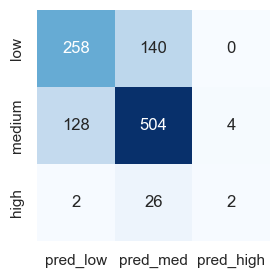

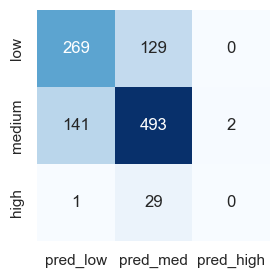

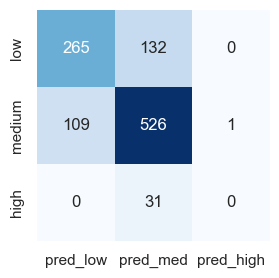

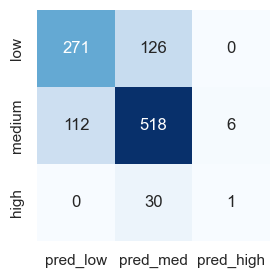

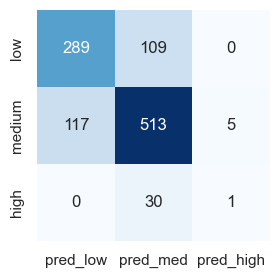

[0.7349624060150376,
 0.7188471433621149,
 0.7349624060150376,
 0.7255235206420102,
 0.4561526384606844]

In [45]:
display(random_forest_kfold_param(X_df_norm, y_df))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_df_norm, y_df, test_size=0.2, random_state=42)
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)
feature_importances = rf_classifier.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X_df_norm.columns,
    'Importance': feature_importances
})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
print(feature_importance_df)
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importances')
plt.show()




In [49]:
ml_df2 = pd.read_csv('whole_csv.csv', sep = ',')
X_df_norm['wine_type'] = ml_df2['wine_type_white']
X_df_norm.drop(['fixed_acidity', 'total_sulfur_dioxide'], axis=1, inplace= True)


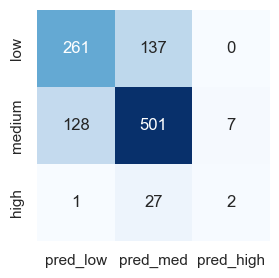

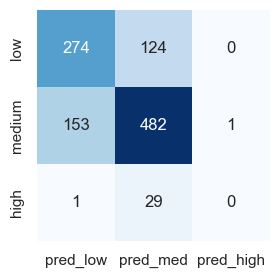

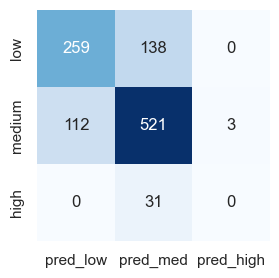

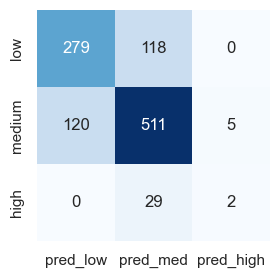

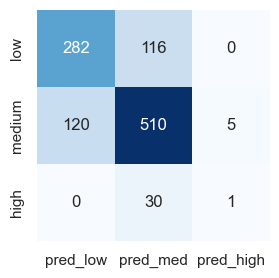

[0.7302631578947368,
 0.7153215954422488,
 0.7302631578947368,
 0.7215003645955258,
 0.4483600101207724]

In [50]:
display(random_forest_kfold_param(X_df_norm, y_df))

In [54]:
print(X_df_norm.head())

   volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide   density        pH  sulphates   alcohol  wine_type
0          0.126667     0.216867        0.308282   0.059801             0.152778  0.267785  0.217054   0.129213  0.115942        1.0
1          0.146667     0.204819        0.015337   0.066445             0.045139  0.132832  0.449612   0.151685  0.217391        1.0
2          0.133333     0.240964        0.096626   0.068106             0.100694  0.154039  0.418605   0.123596  0.304348        1.0
3          0.100000     0.192771        0.121166   0.081395             0.159722  0.163678  0.364341   0.101124  0.275362        1.0
4          0.160000     0.096386        0.098160   0.059801             0.100694  0.150183  0.356589   0.140449  0.231884        1.0


In [ ]:
output_file_path = 'y_df.csv'
y_df.to_csv(output_file_path, index = False)

In [61]:
smote = SMOTE(random_state = 42)
X_train_smote, y_train_smote = smote.fit_resample(X_df, y_df)
print(Counter(y_train_smote))

Counter({'quality_label_encoded': 1})


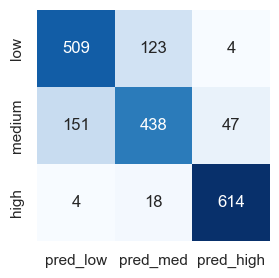

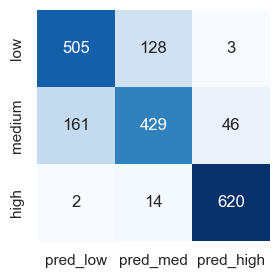

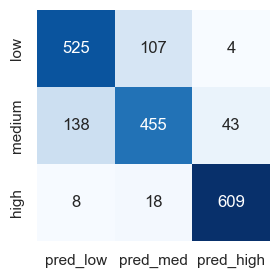

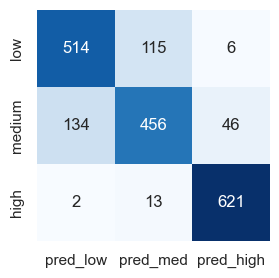

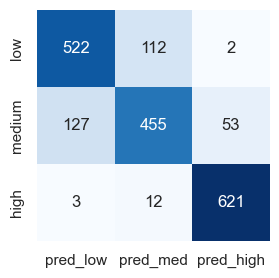

[0.8276211222254103,
 0.8250043054405503,
 0.8276211222254103,
 0.8254583707636852,
 0.7414312605864603]

In [62]:
random_forest_kfold_param(X_train_smote, y_train_smote)

In [65]:
X_df_z = pd.read_csv('X_df_zSc_standardized.csv', sep= ',')
y_df_z = pd.read_csv('y_df.csv', sep = ',')
whole_csv = pd.read_csv('whole_csv.csv')
X_df_z['wine_type'] = whole_csv['wine_type_white']
print(X_df_z.head())

   fixed_acidity  volatile_acidity  citric_acid  residual_sugar  chlorides  free_sulfur_dioxide  total_sulfur_dioxide   density        pH  sulphates   alcohol  wine_type
0      -0.163070         -0.440639     0.282076        3.478304  -0.317143             0.840478              0.984535  2.180171 -1.400959  -0.556721 -1.475130        1.0
1      -0.693555         -0.262314     0.146154       -0.766370  -0.208624            -0.900765              0.315155 -0.180525  0.469784  -0.289571 -0.884822        1.0
2       0.670550         -0.381197     0.553919        0.411472  -0.181494            -0.002059             -0.301380  0.190441  0.220351  -0.623508 -0.378844        1.0
3      -0.011503         -0.678405     0.010232        0.767046   0.035544             0.952816              1.266380  0.359062 -0.216155  -0.890658 -0.547503        1.0
4      -0.769339         -0.143431    -1.077141        0.433695  -0.317143            -0.002059              0.385616  0.122993 -0.278513  -0.423146 -

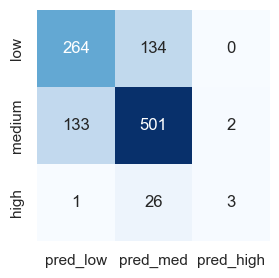

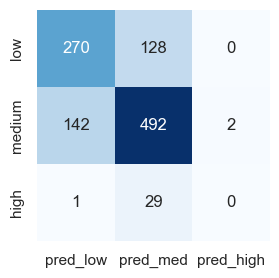

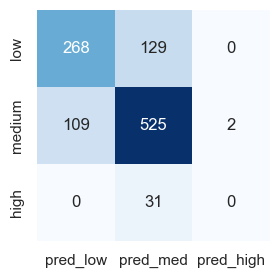

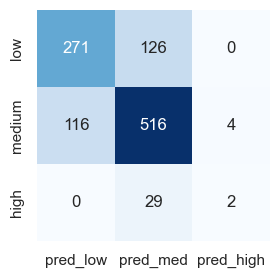

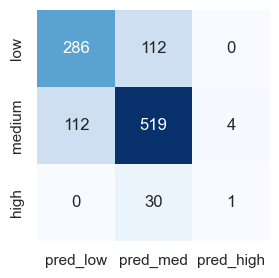

[0.7364661654135338,
 0.722605090946917,
 0.7364661654135338,
 0.7273056647924921,
 0.45958183923886314]

In [67]:
display(random_forest_kfold_param(X_df_z, y_df_z))